In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
main_url = 'https://sgulyano.github.io/eval/'

html_url = ['02226005.html',
            '08846113.html',
            '19689783.html',
            '24363682.html',
            '24674969.html',
            '26742703.html',
            '33472214.html',
            '33561138.html',
            '33565025.html',
            '41557226.html',
            '43951333.html',
            '44868136.html',
            '45435188.html',
            '48033334.html',
            '51435303.html',
            '53231654.html',
            '60189297.html',
            '61116032.html',
            '66887754.html',
            '68346670.html',
            '71728345.html',
            '79550445.html',
            '83255004.html',
            '94026030.html',
            '95860997.html',
            '96905621.html']
eval_url = [main_url + url for url in html_url]

In [3]:
# ดึงข้อมูลทุกเว็บมาเก็บใน list t และ th
tlist, thlist = [], []
for url in eval_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all("table")
    rows = soup.find_all('tr')
    #find all td
    for td in tables:
        if td.find_all('td'):
            tlist.append(td.text.strip())
    #find all th
    for th in rows:
        if th.find_all('th'): # ต้องการ code html ที่เป็น <th> </th>
            thlist.append(th.text.strip())
                    
modified_td = [item.replace('\n', '').replace('\t','').replace('\xa0','') for item in tlist]
modified_th = [item.replace('\n', '').replace('\t','').replace('\xa0','') for item in thlist]

In [4]:
# find all subject
t_subject = []
tsub = ['FGL497','DRI970','RMW014','AZW892','NYE553','NVI781','YRY790','XCM602','DHT256']
for index in range(0, len(modified_td), 3):
    for item in tsub:
        if item in modified_td[index]:
            t_subject.append(item)
            
print(t_subject)
        

['FGL497', 'FGL497', 'DRI970', 'FGL497', 'RMW014', 'NYE553', 'RMW014', 'AZW892', 'NVI781', 'YRY790', 'NVI781', 'FGL497', 'DRI970', 'YRY790', 'YRY790', 'FGL497', 'XCM602', 'RMW014', 'DHT256', 'NVI781', 'RMW014', 'FGL497', 'AZW892', 'YRY790', 'DRI970', 'NYE553']


<function matplotlib.pyplot.show(close=None, block=None)>

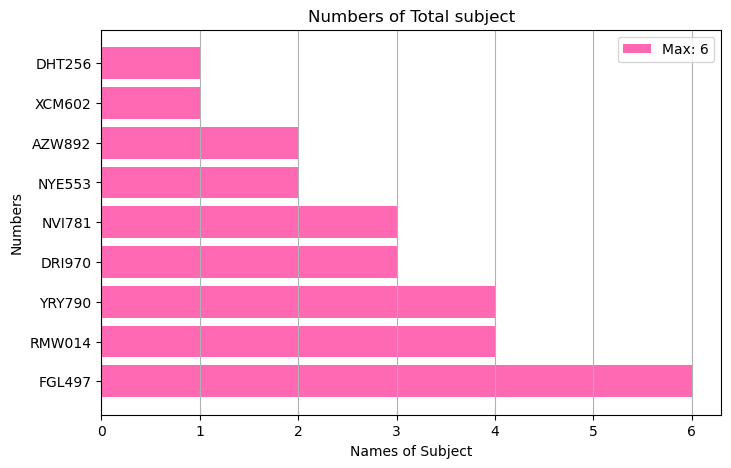

In [5]:
# intro 1 อธิบายวิชาทั้งหมดที่มีและบอกจำนวน อธิบายตต่อว่าในวิชาทั้งหมดนี้จะมีแบบประเมินอยู่ 3 แบบ (ต่ออินโทร 2)
count = {}
for c in t_subject: # count subjects and plot bar chart
    if c not in count:
        count[c] = 1
    else:
        count[c] += 1
t_xbar = list(count.keys())
t_ybar = list(count.values())
# เรียงค่า
combined_list = list(zip(t_xbar, t_ybar))
sorted_list = sorted(combined_list, key=lambda x: x[1], reverse=True)
t_xbar_sorted, t_ybar_sorted = zip(*sorted_list)
plt.figure(figsize=(8,5))
plt.barh(t_xbar_sorted,t_ybar_sorted,color='hotpink')
plt.title('Numbers of Total subject')
plt.xlabel('Names of Subject')
plt.ylabel('Numbers')
plt.legend([f'Max: {max(t_ybar_sorted)}']) 
plt.grid(axis='x')
plt.show

In [6]:
# find part 1 (3 Section)
define_sec1 = ['ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย',
              'ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน',
              'ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้']
free_sec = []
for i in modified_th:
    if all(p in i for p in define_sec1):
        free_sec.append(i)
# find part 2 (2 section(1,3))
free_sec2 = []
for i in modified_th:
    if 'ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย' in i and 'ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้' in i and 'ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน' not in i:
        free_sec2.append(i)
# find part 3 (1 section)
define_sec3 = ['ผู้สอนมีการประเมินผล ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด']
free_sec3 = []
for i3 in modified_th:
    if all(p in i3 for p in define_sec3):
        free_sec3.append(i3)   


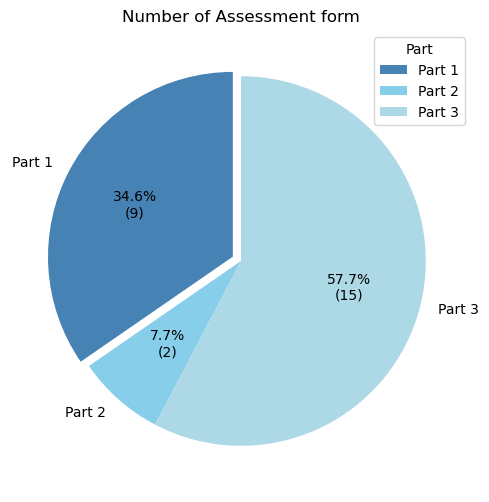

In [7]:
# intro 2 อธิบายว่าจากข้อมูลทั้งหมดมีแบบฟอร์มกี่แบบ แต่ละแบบเป็นอย่างไร และเป้าหมายที่ต้องการหยิบมานำเสนอ project นี้ (แบบประเมินแบบที่ 1)
define_pie = {'Part 1': len(free_sec),
              'Part 2': len(free_sec2),
              'Part 3': len(free_sec3)
}
labels_na = list(define_pie.keys())
values_na = list(define_pie.values())
color_pie = ['steelblue','skyblue','lightblue']
explode = (0.05,0,0) 
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
# กราฟ: แสดงรูปแบบของตัวเลขและเลขทศนิยม
axs.pie(values_na, labels=labels_na, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(values_na) / 100), startangle=90,colors=color_pie,explode=explode)
axs.set_title('Number of Assessment form')
plt.legend(labels_na, title='Part')
plt.show()

In [8]:
# ดึงข้อมูลจากลิสต์ free_sec (วิชาทั้งหมดในแบบประเมินแบบที่ 1) เพื่อมาสร้างตาราง
subject, section, semester, degree, register, assessment = [], [], [], [], [], []
for m in free_sec:
    #แบ่งข้อความเป็นส่วน
    m1 = m.split(':')
    if len(m1) > 3:
        sj = m1[1].split('Sec.')[0]
        sec = m1[2].split('ภาคการศึกษาที่')[0]
        semest = m1[3].split('ระดับการศึกษา')[0]
        dg = m1[4].split('ระดับการศึกษา')[0]
        re = m1[5].split('จำนวนนักศึกษาที่จดทะเบียน')[0]
        asm = m1[6].split('จำนวนนักศึกษาที่ประเมิน')[0]
        subject.append(sj)
        section.append(sec)
        semester.append(semest)
        degree.append(dg)
        register.append(re)
        assessment.append(asm)

# cleaning ต่อเพื่อให้ได้ข้อมูลที่ต้องการ
degree_2, register_2, assessment_2 = [], [], []
for deg in degree:
    sp = deg.split('จำนวนนักศึกษาที่จดทะเบียน')[0]
    degree_2.append(sp)
for reg in register:
    sp2 = reg.split('จำนวนนักศึกษาที่ประเมิน')[0]
    sp2 = int(sp2)
    register_2.append(sp2)
for asses in assessment:
    number = asses.split()[0]
    number = int(number)
    assessment_2.append(number)
    


In [9]:
# DataFrame สำหรับเช็คจำนวนวิชาที่เป็นคำถาม Part 1 (มี 3 ส่วน)
dtf = pd.DataFrame(columns=['รายวิชา','Sec./Gr.','ภาคการศึกษาที่','ระดับการศึกษา','จำนวนนักศึกษาที่จดทะเบียน','จำนวนนักศึกษาที่ประเมิน'])
dtf['รายวิชา'] = subject
dtf['Sec./Gr.'] = section
dtf['ภาคการศึกษาที่'] = semester
dtf['ระดับการศึกษา'] = degree_2
dtf['จำนวนนักศึกษาที่จดทะเบียน'] = register_2
dtf['จำนวนนักศึกษาที่ประเมิน'] = assessment_2
dtf['คิดเป็นเปอร์เซ็นต์'] = round((dtf['จำนวนนักศึกษาที่ประเมิน'] / dtf['จำนวนนักศึกษาที่จดทะเบียน']) * 100,1 )
dtf

,รายวิชา,Sec./Gr.,ภาคการศึกษาที่,ระดับการศึกษา,จำนวนนักศึกษาที่จดทะเบียน,จำนวนนักศึกษาที่ประเมิน,คิดเป็นเปอร์เซ็นต์
0,FGL497,231863,1/2562,ปริญญาตรี โครงการพิเศษ,43,6,14.0
1,DRI970,231863,1/2563,ปริญญาตรี โครงการพิเศษ,43,29,67.4
2,YRY790,231863,2/2561,ปริญญาตรี โครงการพิเศษ,44,7,15.9
3,YRY790,231863,1/2562,ปริญญาตรี โครงการพิเศษ,50,12,24.0
4,DHT256,270981,2/2562,ปริญญาโท โครงการพิเศษ,12,6,50.0
5,NVI781,231863,2/2561,ปริญญาตรี โครงการพิเศษ,44,7,15.9
6,YRY790,728025,1/2563,ปริญญาตรี โครงการพิเศษ,44,9,20.5
7,DRI970,728025,1/2563,ปริญญาตรี โครงการพิเศษ,47,25,53.2
8,NYE553,231863,1/2563,ปริญญาตรี โครงการพิเศษ,43,29,67.4


In [10]:
# แยกตามปี สำหรับอธิบายและตอบคำถาม
extract_a = dtf[dtf['ภาคการศึกษาที่'].str.contains('2561')].reset_index(drop=True)
extract_b = dtf[dtf['ภาคการศึกษาที่'].str.contains('2562')].reset_index(drop=True)
extract_c = dtf[dtf['ภาคการศึกษาที่'].str.contains('2563')].reset_index(drop=True)

In [11]:
# ดึงส่วนสุดท้ายในแต่ละอัน (แต่ละลิสต์เมื่อ split จะมี len = 8)
dip_1, section1, sec_1SD_Xbar = [], [], []
for dip in free_sec:
    spl = dip.split(':')
    dip_1.append(spl[8])
# ดึง ส่วนที่ 1 ถึง ผลรวมของ X-bar และ SD  (ข้อมูลดิบ)
for sec_1XD in dip_1:
    start_a = sec_1XD[155:191] # 155:938 s3c 1 
    end_a = sec_1XD[870:960] # 870:950
    section1.append([start_a,end_a])
# คลีนให้เหลือแต่ข้อมูลที่ต้องการ
for i in section1:
    text_part = i[1]
    desired_output = text_part.split('รวม', 1)
    if len(desired_output) > 1:
        output_list = [i[0], 'รวม' + desired_output[1]]
        sec_1SD_Xbar.append(output_list)

# ดึง ส่วนที่ 2 ถึง ผลรวมของ X-bar และ SD (ข้อมูลดิบ)
all_data2_st, all_data2_end, section2, sec_2SD_Xbar   = [], [], [], []
for dip_2 in dip_1:
    start_b = dip_2[920:990]
    end_b = dip_2[1630:1755]
    part1 = start_b.split(',')
    part2 = end_b.split(',')
    all_data2_st.append(part1)
    all_data2_end.append(part2)
# คลีนให้เป็น 'ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน'
for item in all_data2_st:
    for sub_item in item:
        index_part_1 = sub_item.find('ส่วนที่ 2')
        index_agency = sub_item.find('หน่วยงาน')
        if index_part_1 != -1 and index_agency != -1:
            # เมื่อพบทั้ง 'ส่วนที่ 2' และ 'หน่วยงาน' ให้เก็บตั้งแต่ 'ส่วนที่ 2' ถึง 'หน่วยงาน'
            section2.append([sub_item[index_part_1:index_agency + len('หน่วยงาน')]])
            
# ดึงส่วนของ X-bar และ SD ใน section 2 กำหนดให้ดึงตั้งแต่ 'รวม' และไม่เกิน 'ส่วนที่ 3'
for item in all_data2_end:
    for sub_item in item:
        index_part2 = sub_item.find('รวม')
        index_agency2 = sub_item.find('ส่วนที่ 3')
        if index_part2 != -1 and index_agency2 != -1:
            # เมื่อพบทั้ง 'ส่วนที่ 2' และ 'หน่วยงาน' ให้เก็บตั้งแต่ 'รวม' ถึง 'ส่วนที่ 3'
            sec_2SD_Xbar.append([sub_item[index_part2:index_agency2]])

# ดึง ส่วนที่ 3 ถึง ผลรวมของ X-bar และ SD (ข้อมูลดิบ)
all_data3, section3, sec_3SD_Xbar = [], [], []
for dip_3 in dip_1:
    start_c = dip_3[1670:]
    all_data3.append(start_c)
#find section 3
for item in all_data3:
    cl_start = item.find('ส่วนที่ 3')
    cl_end = item.find('รวมทั้งหมด')
    result = item[cl_start:cl_end]
    section3.append(result)
# ดึงส่วนของ X-bar และ SD
for item in section3:
    adc = item.split('รวม')
    power_adc = [adc[1]]
    sec_3SD_Xbar.append(power_adc)
    

In [12]:
# รวม ส่วนที่ 1 x-bar s.d.
extract_s, extract_xs = [], []
for j in section1:
    power = [j[0]]
    extract_s.append(power)
    
for p in range(len(sec_1SD_Xbar)):
    for pm in sec_1SD_Xbar[p]:
        scp = pm.split('ส่วนที่ 2')
    ij = scp[0].replace('ส่วน','').replace('ส่ว','')
    en = float(ij[-4:])
    st = float(ij[-8:-4])
    keep2 = [st,en]
    extract_xs.append(keep2)
    
toa_1 = []
for t,u in zip(extract_s,extract_xs):
    toa_1.append(t+u)
    
# รวม ส่วนที่ 2 x-bar และ s.d.
list_alphay = []
for i in range(len(sec_2SD_Xbar)):
    for i2 in sec_2SD_Xbar[i]:
        aka = float(i2[-4:])
        amg = float(i2[-8:-4]) 
        keep = [amg,aka]
        list_alphay.append(keep)
        
toa_2 = []
for x, y in zip(section2, list_alphay):
    toa_2.append(x + y)
    
# รวมส่วนที่ 3 x-bar และ s.d.
ex_sec3, ex_xbar_sd = [], []
for i in section3:
    spl_3 = i.split('1โสต')
    power_3 = [spl_3[0]]
    ex_sec3.append(power_3)

for i in range(len(sec_3SD_Xbar)):
    for p in sec_3SD_Xbar[i]:
        intel = float(p[-4:]) # SD
        giga = float(p[-8:-4]) # X-bar
        power_3 = [giga,intel]
        ex_xbar_sd.append(power_3)
        
toa_3 = []
for k,v in zip(ex_sec3,ex_xbar_sd):
    toa_3.append(k+v)

In [13]:
# เพิ่ม section X-bar และ S.D.
dtf['ส่วนที่ 1'] = [i[0] for i in toa_1]
dtf['X-Bar_A'] = [i[1] for i in toa_1]
dtf['S.D._A'] = [i[2] for i in toa_1]

dtf['ส่วนที่ 2'] = [i[0] for i in toa_2]
dtf['X-Bar_B'] = [i[1] for i in toa_2]
dtf['S.D._B'] = [i[2] for i in toa_2]

dtf['ส่วนที่ 3'] = [i[0] for i in toa_3]
dtf['X-Bar_C'] = [i[1] for i in toa_3]
dtf['S.D._C'] = [i[2] for i in toa_3]

# แก้ไข cell
columns_to_update = ['ส่วนที่ 1', 'ส่วนที่ 2', 'ส่วนที่ 3']
for c in columns_to_update:
    dtf[c] = dtf[c].str.replace('ส่วนที่ 1', '')
    dtf[c] = dtf[c].str.replace('ส่วนที่ 2', '')
    dtf[c] = dtf[c].str.replace('ส่วนที่ 3', '')
    

In [14]:
# แยกตามปี DataFrame สำหรับค่า X-Bar และ S.D.
filtered_dtf1 = dtf[dtf['ภาคการศึกษาที่'].str.contains('2561')].reset_index(drop=True)
filtered_dtf2 = dtf[dtf['ภาคการศึกษาที่'].str.contains('2562')].reset_index(drop=True)
filtered_dtf3 = dtf[dtf['ภาคการศึกษาที่'].str.contains('2563')].reset_index(drop=True)

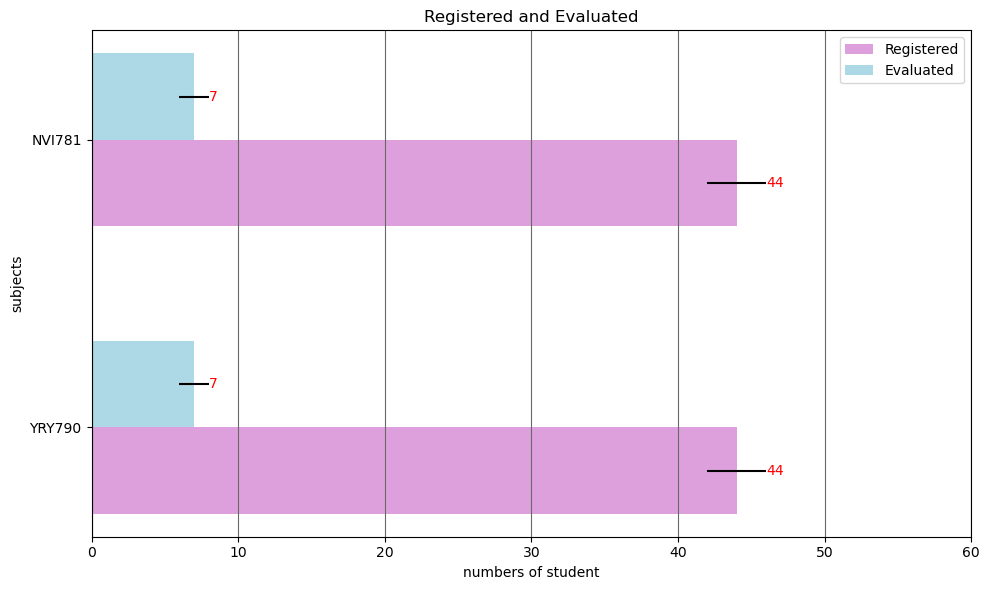

In [15]:
# จุดที่น่าสนใจจุด 1 จำนวนประเมินเหมือนกัน 44/7
subject_A = filtered_dtf1['รายวิชา']
registered_students = filtered_dtf1['จำนวนนักศึกษาที่จดทะเบียน']
evaluated_students = filtered_dtf1['จำนวนนักศึกษาที่ประเมิน']
xerr1 = [2,2]
xerr2 = [1,1]
bar_width = 0.30
bar_positions1 = range(len(subject_A))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
fig, ax = plt.subplots(figsize=(10,6))
barh1 = ax.barh(bar_positions1, registered_students, height=bar_width, label='Registered', color='plum',xerr=xerr1)
barh2 = ax.barh(bar_positions2, evaluated_students, height=bar_width, label='Evaluated', color='lightblue',xerr=xerr2)
ax.bar_label(barh1, color='red')
ax.bar_label(barh2, color='red')
plt.xlabel('numbers of student')
plt.ylabel('subjects')
plt.title('Registered and Evaluated')
plt.xlim(0,60)
plt.yticks([pos + bar_width / 2 for pos in bar_positions1], subject_A)
plt.grid(axis='x', color='dimgray')
plt.tight_layout()
plt.legend()

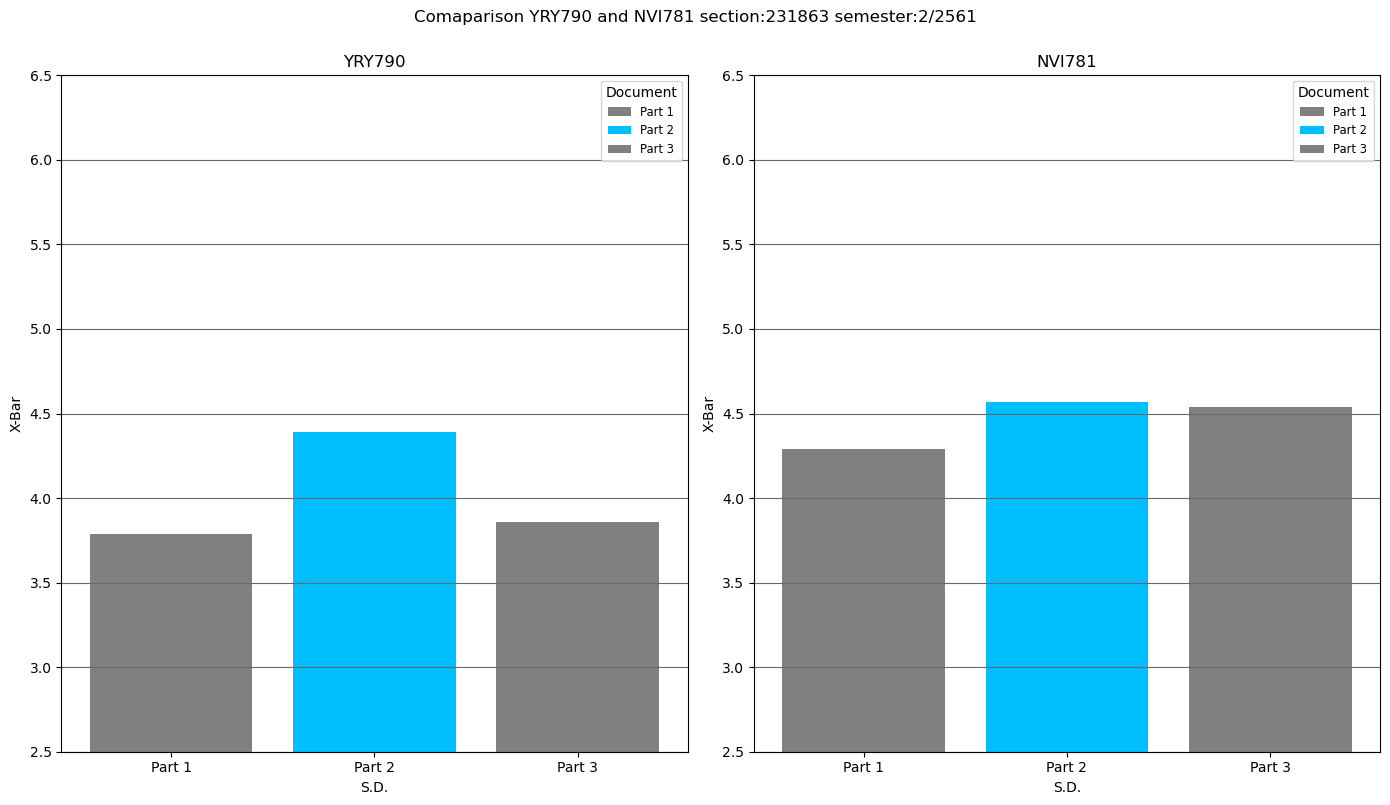

In [16]:
# อธิบายจุดที่ใกล้เคียงกันนั้นคือ ส่วนที่ 2 และนำไปเปรียบเทียบข้อคำถามต่อไป
locA1 = filtered_dtf1.iloc[0] # วิชา YRY970
locA2 = filtered_dtf1.iloc[1] # วิชา NVI781

y_A1 = locA1[['X-Bar_A', 'X-Bar_B', 'X-Bar_C']].values.flatten() # values.flatten() จะแปลงเป็น array 1มิติ array
x_A1 = locA1[['S.D._A', 'S.D._B', 'S.D._C']].values.flatten()
y_A2 = locA2[['X-Bar_A', 'X-Bar_B', 'X-Bar_C']].values.flatten()
x_A2 = locA2[['S.D._A', 'S.D._B', 'S.D._C']].values.flatten()

fig, axs = plt.subplots(1, 2, figsize=(14, 8))
# first subplots
colorA = ['gray','deepskyblue','gray']
axs[0].bar(np.arange(3), y_A1, color=colorA, label=['Part 1', 'Part 2', 'Part 3'])
axs[0].set_title('YRY790')
axs[0].set_xlabel('S.D.')
axs[0].set_ylabel('X-Bar')
axs[0].set_xticks(np.arange(3), labels=['Part 1','Part 2','Part 3'])
axs[0].set_ylim(2.5,6.5)
axs[0].legend(title='Document', fontsize='small')
axs[0].grid(axis='y', color='dimgray')
# second subplot 
axs[1].bar(np.arange(3), y_A2, color=colorA, label=['Part 1','Part 2','Part 3'])
axs[1].set_title('NVI781')
axs[1].set_xlabel('S.D.')
axs[1].set_ylabel('X-Bar')
axs[1].set_xticks(np.arange(3), labels=['Part 1','Part 2','Part 3'])
axs[1].set_ylim(2.5,6.5)
axs[1].legend(title='Document', fontsize='small')
axs[1].grid(axis='y', color='dimgray')

plt.subplots_adjust(wspace=0.4)
plt.suptitle('Comaparison YRY790 and NVI781 section:231863 semester:2/2561', y=1)
plt.tight_layout()
plt.show()

In [17]:
# ดึงข้อมูล วิชา YRY790 231863 2/2561 (section 2)
yry790 = eval_url[9] # define link for web scraping
lista, listb, listc, listd = [], [], [], []
liste, listf, listg, listh = [], [], [], []
listsum = []
r1 = requests.get(yry790)
s1 = BeautifulSoup(r1.content, 'html.parser')
border_A = s1.find('table',{'border':'1', 'class':'normaldetail'})
for i in border_A:
    tr_a = i.find_all('tr')[13:24]
    for i2 in tr_a[2]:
        lista.append(i2.text)
    for i3 in tr_a[3]:
        listb.append(i3.text)
    for i4 in tr_a[4]:
        listc.append(i4.text)
    for i5 in tr_a[5]:
        listd.append(i5.text)
    for i6 in tr_a[6]:
        liste.append(i6.text)
    for i7 in tr_a[7]:
        listf.append(i7.text)
    for i8 in tr_a[8]:
        listg.append(i8.text)
    for i9 in tr_a[9]:
        listh.append(i9.text)
    for i10 in tr_a[10]:
        listsum.append(i10.text)

powerlist = [lista,listb,listc,listd,liste,listf,listg,listh] # เหลือ listsum


In [18]:
ais, ais2, ais3, ais4, ais5, ais6 = [], [], [], [], [], []
for p1 in powerlist:
    ais.append(int(p1[2]))
ais.append(int(listsum[1]))

for p2 in powerlist:
    ais2.append(int(p2[4]))
ais2.append(int(listsum[3]))

for p3 in powerlist:
    ais3.append(int(p3[6]))
ais3.append(int(listsum[5]))

for p4 in powerlist:
    ais4.append(int(p4[8]))
ais4.append(int(listsum[7]))

for p5 in powerlist:
    ais5.append(int(p5[10]))
ais5.append(int(listsum[9]))

for p6 in powerlist:
    ais6.append(int(p6[12]))
ais6.append(int(listsum[11]))

# แปลงเป็น series
fivepoint_a = pd.Series(ais)
fourpoint_a = pd.Series(ais2)
threepoint_a = pd.Series(ais3)
twopoint_a = pd.Series(ais4)
onepoint_a = pd.Series(ais5)
zeropoint_a = pd.Series(ais6)

In [19]:
# DataFrame วิชา YRY790 ส่วนที่ 2
column_bodyA = ['YRY790 ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน','5 point','4 point','3 point','2 point','1 point','0 point']
bodyslam = pd.DataFrame(columns=column_bodyA)
bodyslam['YRY790 ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน'] = ['ผู้สอนแจ้งวัตถุประสงค์และเนื้อหารายวิชาตามเค้าโครงการสอนรายวิชาอย่างชัดเจน','ผู้สอนแจ้งเกณฑ์และวิธีประเมินผลล่วงหน้าชัดเจน',
                                                 'ผู้สอนเข้าสอนและเลิกสอนตรงเวลา','ผู้สอนมาสอนสม่ำเสมอ','ผู้สอนสอนเนื้อหาครบถ้วน และสอดคล้องตามเค้าโครงการสอนรายวิชา',
                                                 'ผู้สอนมีการเตรียมการสอนมาอย่างดี','ผู้สอนชี้แนะจุดมุ่งหมายประเด็นหรือข้อสรุปที่เป็นเนื้อหาสาระสำคัญ','ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการเรียนการสอน','รวม']
bodyslam['5 point'] = fivepoint_a
bodyslam['4 point'] = fourpoint_a
bodyslam['3 point'] = threepoint_a
bodyslam['2 point'] = twopoint_a
bodyslam['1 point'] = onepoint_a
bodyslam['0 point'] = zeropoint_a
# bodyslam = bodyslam.style.set_properties(**{'text-align': 'left'})
bodyslam

,YRY790 ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน,5 point,4 point,3 point,2 point,1 point,0 point
0,ผู้สอนแจ้งวัตถุประสงค์และเนื้อหารายวิชาตามเค้า...,3,4,0,0,0,0
1,ผู้สอนแจ้งเกณฑ์และวิธีประเมินผลล่วงหน้าชัดเจน,5,2,0,0,0,0
2,ผู้สอนเข้าสอนและเลิกสอนตรงเวลา,6,1,0,0,0,0
3,ผู้สอนมาสอนสม่ำเสมอ,5,2,0,0,0,0
4,ผู้สอนสอนเนื้อหาครบถ้วน และสอดคล้องตามเค้าโครง...,2,4,1,0,0,0
5,ผู้สอนมีการเตรียมการสอนมาอย่างดี,3,3,1,0,0,0
6,ผู้สอนชี้แนะจุดมุ่งหมายประเด็นหรือข้อสรุปที่เป...,2,3,2,0,0,0
7,ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการ...,2,4,0,1,0,0
8,รวม,28,23,4,1,0,0


In [20]:
# ดึงข้อมูล วิชา NVI781 231863 2/2561 (section 2)
nvi781 = eval_url[-7] # define link for web scraping
lista2, listb2, listc2, listd2 = [], [], [], []
liste2, listf2, listg2, listh2 = [], [], [], []
listsum2 = []
r2 = requests.get(nvi781)
s2 = BeautifulSoup(r2.content, 'html.parser')
border_B = s2.find('table',{'border':'1', 'class':'normaldetail'})
for i in border_B:
    tr_b = i.find_all('tr')[13:24]
    for i2 in tr_b[2]:
        lista2.append(i2.text)
    for i3 in tr_b[3]:
        listb2.append(i3.text)
    for i4 in tr_b[4]:
        listc2.append(i4.text)
    for i5 in tr_b[5]:
        listd2.append(i5.text)
    for i6 in tr_b[6]:
        liste2.append(i6.text)
    for i7 in tr_b[7]:
        listf2.append(i7.text)
    for i8 in tr_b[8]:
        listg2.append(i8.text)
    for i9 in tr_b[9]:
        listh2.append(i9.text)
    for i10 in tr_b[10]:
        listsum2.append(i10.text)
        
powerlist2 = [lista2,listb2,listc2,listd2,liste2,listf2,listg2,listh2] # เหลือ listsum2

In [21]:
true, true2, true3, true4, true5, true6 = [], [], [], [], [], []
for k1 in powerlist2:
    true.append(int(k1[2]))
true.append(int(listsum2[1]))

for k2 in powerlist2:
    true2.append(int(k2[4]))
true2.append(int(listsum2[3]))

for k3 in powerlist2:
    true3.append(int(k3[6]))
true3.append(int(listsum2[5]))

for k4 in powerlist2:
    true4.append(int(k4[8]))
true4.append(int(listsum2[7]))

for k5 in powerlist2:
    true5.append(int(k5[10]))
true5.append(int(listsum2[9]))

for k6 in powerlist2:
    true6.append(int(k6[12]))
true6.append(int(listsum2[11]))

#แปลงเป็น Series
fivepoint_b = pd.Series(true)
fourpoint_b = pd.Series(true2)
threepoint_b = pd.Series(true3)
twopoint_b = pd.Series(true4)
onepoint_b = pd.Series(true5)
zeropoint_b = pd.Series(true6)

In [22]:
# DataFrame ของวิชา NVI781 ส่วนที่ 2
column_bodyB = ['NVI781 ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน','5 point','4 point','3 point','2 point','1 point','0 point']
bodyslam2 = pd.DataFrame(columns=column_bodyB)
bodyslam2['NVI781 ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน'] = ['ผู้สอนแจ้งวัตถุประสงค์และเนื้อหารายวิชาตามเค้าโครงการสอนรายวิชาอย่างชัดเจน','ผู้สอนแจ้งเกณฑ์และวิธีประเมินผลล่วงหน้าชัดเจน',
                                                 'ผู้สอนเข้าสอนและเลิกสอนตรงเวลา','ผู้สอนมาสอนสม่ำเสมอ','ผู้สอนสอนเนื้อหาครบถ้วน และสอดคล้องตามเค้าโครงการสอนรายวิชา',
                                                 'ผู้สอนมีการเตรียมการสอนมาอย่างดี','ผู้สอนชี้แนะจุดมุ่งหมายประเด็นหรือข้อสรุปที่เป็นเนื้อหาสาระสำคัญ','ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการเรียนการสอน','รวม']
bodyslam2['5 point'] = fivepoint_b
bodyslam2['4 point'] = fourpoint_b
bodyslam2['3 point'] = threepoint_b
bodyslam2['2 point'] = twopoint_b
bodyslam2['1 point'] = onepoint_b
bodyslam2['0 point'] = zeropoint_b
# bodyslam2 = bodyslam2.style.set_properties(**{'text-align': 'left'})
bodyslam2

,NVI781 ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน,5 point,4 point,3 point,2 point,1 point,0 point
0,ผู้สอนแจ้งวัตถุประสงค์และเนื้อหารายวิชาตามเค้า...,3,4,0,0,0,0
1,ผู้สอนแจ้งเกณฑ์และวิธีประเมินผลล่วงหน้าชัดเจน,3,4,0,0,0,0
2,ผู้สอนเข้าสอนและเลิกสอนตรงเวลา,6,1,0,0,0,0
3,ผู้สอนมาสอนสม่ำเสมอ,4,3,0,0,0,0
4,ผู้สอนสอนเนื้อหาครบถ้วน และสอดคล้องตามเค้าโครง...,4,3,0,0,0,0
5,ผู้สอนมีการเตรียมการสอนมาอย่างดี,3,4,0,0,0,0
6,ผู้สอนชี้แนะจุดมุ่งหมายประเด็นหรือข้อสรุปที่เป...,4,3,0,0,0,0
7,ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการ...,5,2,0,0,0,0
8,รวม,32,24,0,0,0,0


In [23]:
# เรียงค่ามากสุดไว้ด้านบน
body_sortA = bodyslam.sort_values(by='5 point', ascending=False)
body_sortB = bodyslam2.sort_values(by='5 point', ascending=False)
# เลือกหยิบแค่ค่าที่มีคนประเมิน 5 กับ 6 
body_sortA = body_sortA.loc[[2,1,3]].reset_index(drop=True)
body_sortB = body_sortB.loc[[2,7,3]].reset_index(drop=True)

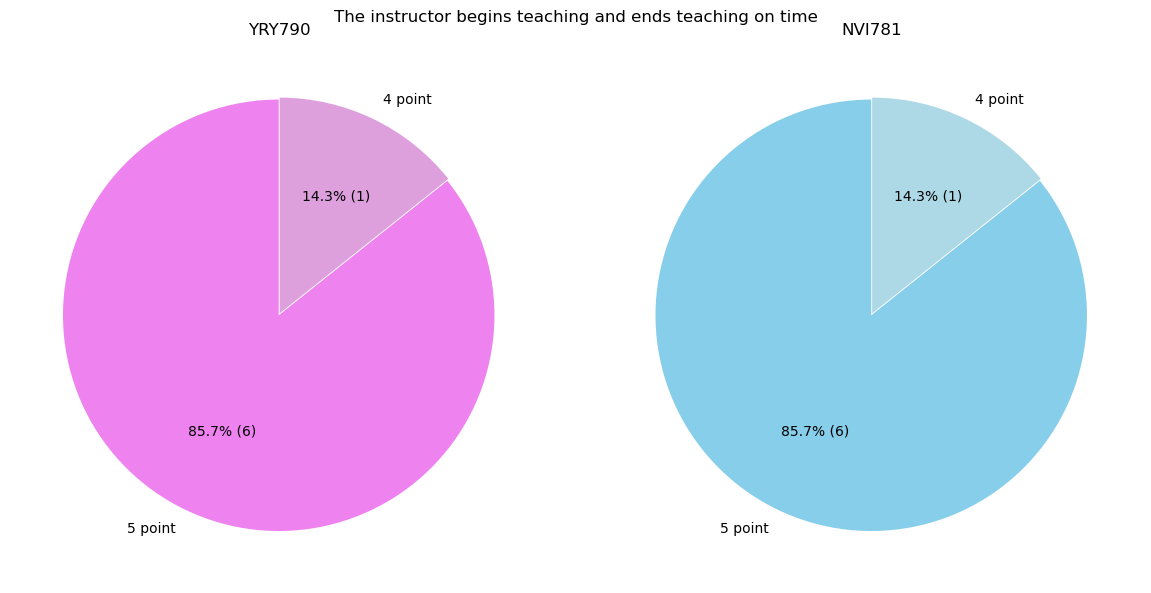

In [24]:
# สรุปจุดที่น่าสนใจจุด 1 ทั้ง 2 วิชา
pointsA = body_sortA.iloc[0, 1:].loc[lambda x: x > 0]
pointsB = body_sortB.iloc[0, 1:].loc[lambda x: x > 0]
fig, axs = plt.subplots(1,2, figsize=(12,6))
colorA = ['violet','plum']
colorB = ['skyblue','lightblue']
explodep=(0.01,0)
# Plotting the pie chart
axs[0].pie(pointsA, labels=pointsA.index, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(pointsA) / 100), startangle=90, colors=colorA,explode=explodep)
axs[0].set_title('YRY790')

axs[1].pie(pointsB, labels=pointsB.index, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(pointsB) / 100), startangle=90, colors=colorB,explode=explodep)
axs[1].set_title('NVI781')
plt.suptitle('The instructor begins teaching and ends teaching on time')
plt.tight_layout()
plt.show()

In [25]:
extract_b

,รายวิชา,Sec./Gr.,ภาคการศึกษาที่,ระดับการศึกษา,จำนวนนักศึกษาที่จดทะเบียน,จำนวนนักศึกษาที่ประเมิน,คิดเป็นเปอร์เซ็นต์
0,FGL497,231863,1/2562,ปริญญาตรี โครงการพิเศษ,43,6,14.0
1,YRY790,231863,1/2562,ปริญญาตรี โครงการพิเศษ,50,12,24.0
2,DHT256,270981,2/2562,ปริญญาโท โครงการพิเศษ,12,6,50.0


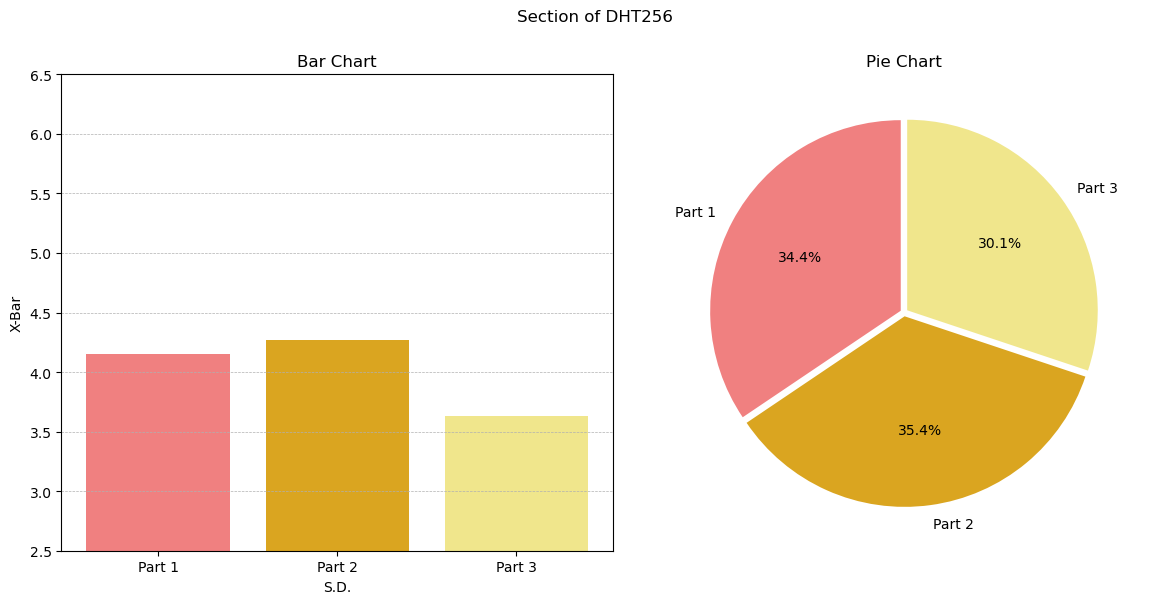

In [26]:
# อธิบาย X-bar แต่ละส่วนของคำถาม
locB1 = filtered_dtf2.iloc[2] # ดึงวิชา DHT256 ออกมาเก็บในตัวแปร
y_B1 = locB1[['X-Bar_A', 'X-Bar_B', 'X-Bar_C']].values.flatten()
x_B1 = locB1[['S.D._A', 'S.D._B', 'S.D._C']].values.flatten()
colorB = ['lightcoral','goldenrod','khaki']
explodeB = (0.02,0.02,0.02)

# plot bar chart
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 
axs[0].bar(np.arange(3), y_B1, label=['Part 1', 'Part 2', 'Part 3'],color=colorB)
axs[0].set_ylim(2.5,6.5)
axs[0].set_title('Bar Chart')
axs[0].set_xticks(np.arange(3), labels=['Part 1','Part 2','Part 3'])
axs[0].set_xlabel('S.D.')
axs[0].set_ylabel('X-Bar')
axs[0].grid(axis='y')
axs[0].grid(axis='y', linestyle='--', linewidth=0.5)
# plot pie chart
axs[1].pie(y_B1, labels=['Part 1','Part 2','Part 3'], autopct='%1.1f%%', startangle=90, colors=colorB, explode=explodeB)
axs[1].set_title('Pie Chart')

plt.suptitle('Section of DHT256', y=1)
plt.tight_layout()
plt.show()

In [27]:
# ดึงข้อมูลส่วนที่ 3 และ รวมทั้งหมด
dht256 = eval_url[-8] # define link for web scraping
lista3 = []
r3 = requests.get(dht256)
s3 = BeautifulSoup(r3.content, 'html.parser')
border_C = s3.find('table',{'border':'1', 'class':'normaldetail'})
for i in border_C:
    tr_c = i.find_all('tr')[-1]
    for i2 in tr_c:
        lista3.append(i2.text)
print(lista3)

['รวมทั้งหมด', '46', '38.33', '46', '38.33', '24', '20.00', '1', '.83', '3', '2.50', '0', '.00', '4.09', '0.92']


In [28]:
dtac, dtac2, dtac3, dtac4, dtac5, dtac6 = [], [], [], [], [], []
dtacX, dtacSD = [], []
dtac.append(int(lista3[1]))
dtac2.append(int(lista3[3]))
dtac3.append(int(lista3[5]))
dtac4.append(int(lista3[7]))
dtac5.append(int(lista3[9]))
dtac6.append(int(lista3[11]))
dtacX.append(float(lista3[13]))
dtacSD.append(float(lista3[14]))
#แปลงเป็น Series
fivepoint_c = pd.Series(dtac)
fourpoint_c = pd.Series(dtac2)
threepoint_c = pd.Series(dtac3)
twopoint_c = pd.Series(dtac4)
onepoint_c = pd.Series(dtac5)
zeropoint_c = pd.Series(dtac6)
xbarpoint_c = pd.Series(dtacX)
sdpoint_c = pd.Series(dtacSD)

In [29]:
# เก็บค่า X-Bar และ S.D.
xbar_mg = filtered_dtf2[['X-Bar_A','X-Bar_B','X-Bar_C']].loc[2].tolist()
xbar_mg.append(float(lista3[13]))
sd_mg = filtered_dtf2[['S.D._A','S.D._B','S.D._C']].loc[2].tolist()
sd_mg.append(float(lista3[14]))

# สร้าง DataFrame ใหม่
test_df = pd.DataFrame(columns=['X-Bar','SD'])
test_df['X-Bar'] = xbar_mg
test_df['SD'] = sd_mg

# สำหรับ plot กราฟ 2 กราฟ
dht_3sec = test_df.loc[:2]
dht_all = test_df.loc[3]
dht_all_2 = pd.DataFrame(dht_all)
dht_all_2 = dht_all_2.transpose().reset_index()

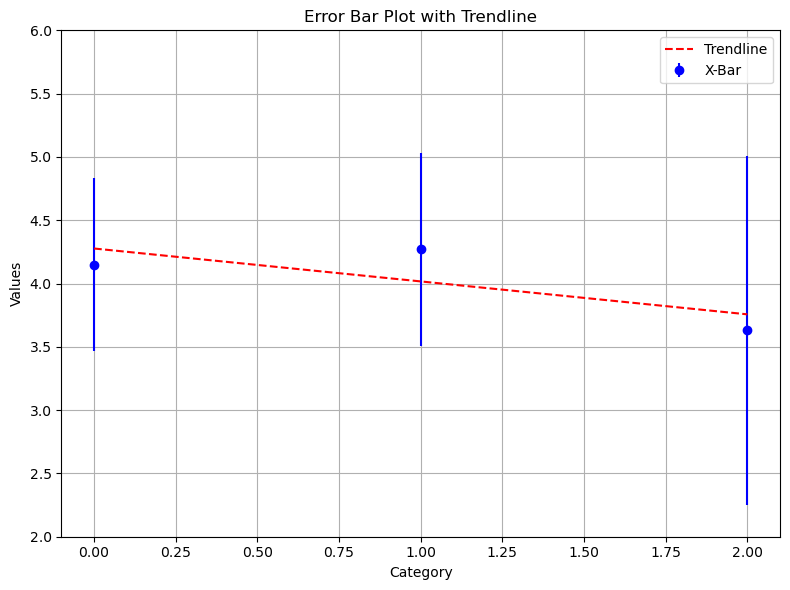

In [30]:

plt.figure(figsize=(8,6))
plt.errorbar(dht_3sec.index, dht_3sec['X-Bar'], yerr=dht_3sec['SD'], fmt='o', color='b', label='X-Bar')
z = np.polyfit(dht_3sec.index, dht_3sec['X-Bar'], 1)  # Linear polynomial
p = np.poly1d(z)
trendline_x = np.linspace(dht_3sec.index.min(), dht_3sec.index.max(), 100)
trendline_y = p(trendline_x)
plt.plot(trendline_x, trendline_y, color='r', linestyle='--', label='Trendline')
plt.title('Error Bar Plot with Trendline')
plt.xlabel('Category')
plt.ylabel('Values')
plt.ylim(2,6)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# DataFrame สำหรับดึงส่วน รวมทั้งหมด
column_bodyC = ['DHT256 คะแนนรวมทุกส่วน','5 point','4 point','3 point','2 point','1 point','0 point']
bodyslam3 = pd.DataFrame(columns=column_bodyC)
bodyslam3['DHT256 คะแนนรวมทุกส่วน'] = ['รวมทั้งหมด']
bodyslam3['5 point'] = fivepoint_c
bodyslam3['4 point'] = fourpoint_c
bodyslam3['3 point'] = threepoint_c
bodyslam3['2 point'] = twopoint_c
bodyslam3['1 point'] = onepoint_c
bodyslam3['0 point'] = zeropoint_c
bodyslam3['X-Bar'] = xbarpoint_c
bodyslam3['S.D.'] = sdpoint_c
bodyslam3

,DHT256 คะแนนรวมทุกส่วน,5 point,4 point,3 point,2 point,1 point,0 point,X-Bar,S.D.
0,รวมทั้งหมด,46,46,24,1,3,0,4.09,0.92


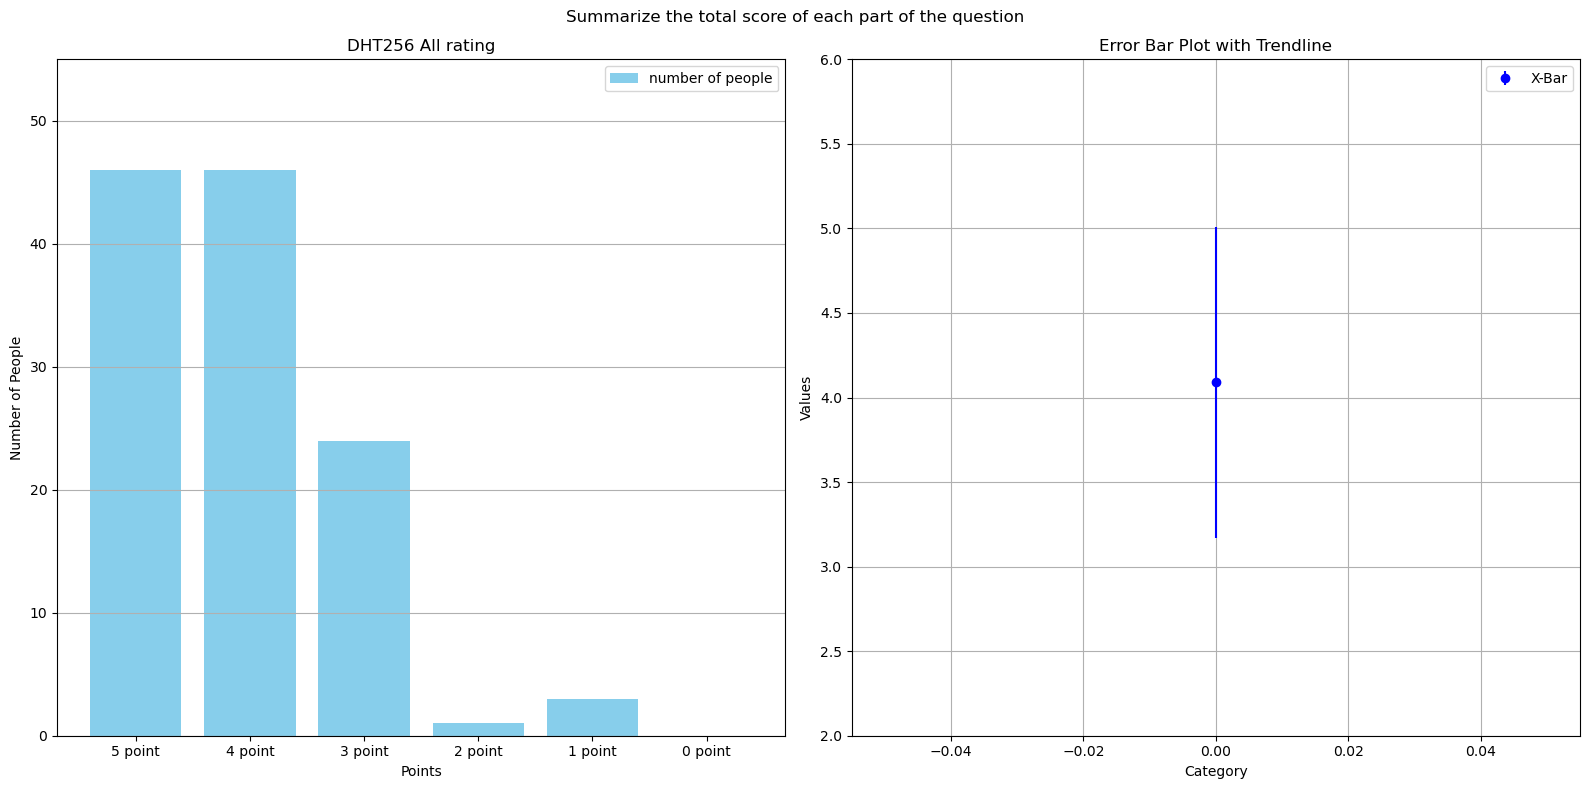

In [32]:
# คะแนนรวมทั้งหมดในวิชานี้
testpa = bodyslam3
xDHT = ['5 point', '4 point', '3 point', '2 point', '1 point', '0 point']
yDHT = testpa[xDHT].values.flatten()

fig, axs = plt.subplots(1,2, figsize=(16,8))

axs[0].bar(xDHT, yDHT, color='skyblue')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Number of People')
axs[0].set_ylim(0,55)
axs[0].set_title('DHT256 All rating')
axs[0].legend(labels=['number of people'])
axs[0].grid(axis='y')

axs[1].errorbar(dht_all_2.index, dht_all_2['X-Bar'], yerr=dht_all_2['SD'], fmt='o', color='b', label='X-Bar')
axs[1].set_title('Error Bar Plot with Trendline')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Values')
axs[1].set_ylim(2,6)
axs[1].legend()
axs[1].grid(True)

plt.suptitle('Summarize the total score of each part of the question')
plt.tight_layout()
plt.show()

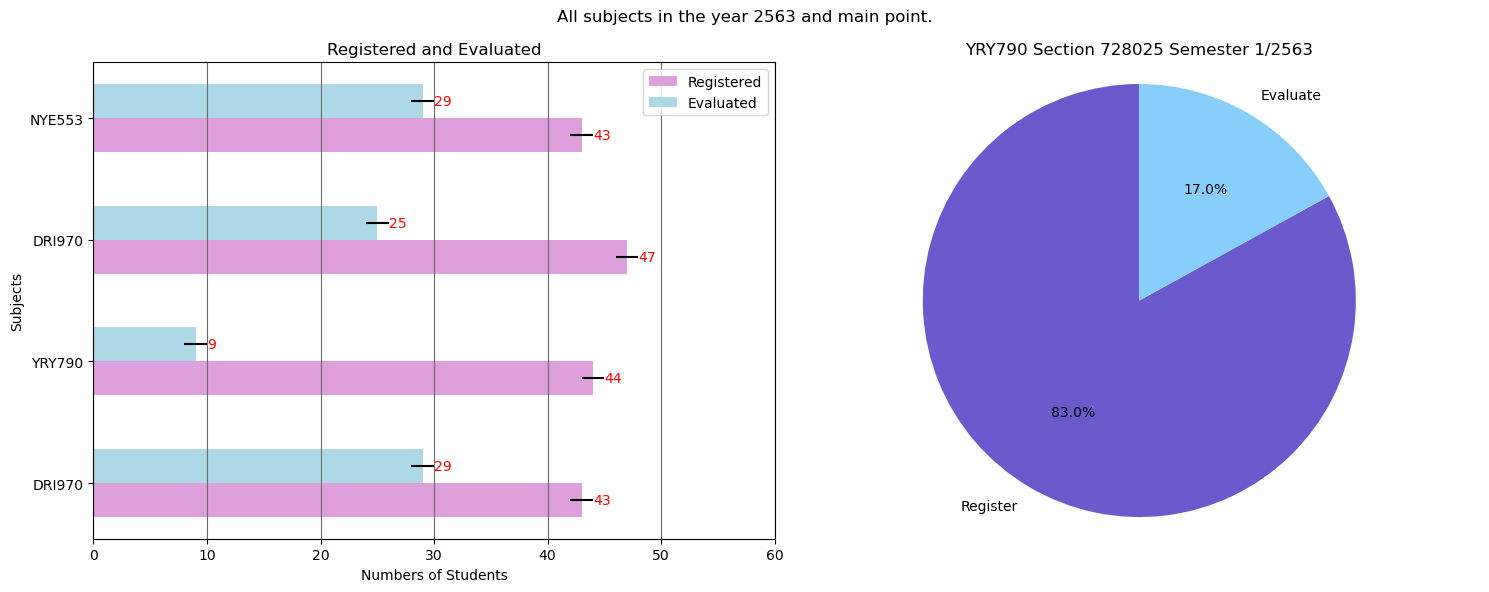

In [33]:
# จุดน่าสนใจจุดที่ 3
subject_C = filtered_dtf3['รายวิชา']
registered_studentsC = filtered_dtf3['จำนวนนักศึกษาที่จดทะเบียน']
evaluated_studentsC = filtered_dtf3['จำนวนนักศึกษาที่ประเมิน']
xerr_c1 = [1, 1, 1, 1]
xerr_c2 = [1, 1, 1, 1]
bar_widthC = 0.28
bar_positions1 = range(len(subject_C))
bar_positions2 = [pos + bar_widthC for pos in bar_positions1]

# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting the bar chart on the first subplot
barh1 = ax1.barh(bar_positions1, registered_studentsC, height=bar_widthC, label='Registered', color='plum', xerr=xerr_c1)
barh2 = ax1.barh(bar_positions2, evaluated_studentsC, height=bar_widthC, label='Evaluated', color='lightblue', xerr=xerr_c2)
ax1.bar_label(barh1, color='red')
ax1.bar_label(barh2, color='red')
ax1.set_xlabel('Numbers of Students')
ax1.set_ylabel('Subjects')
ax1.set_title('Registered and Evaluated')
ax1.set_xlim(0, 60)
ax1.set_yticks([pos + bar_widthC / 2 for pos in bar_positions1])
ax1.set_yticklabels(subject_C)
ax1.grid(axis='x', color='dimgray')
ax1.legend()

# Plotting the pie chart on the second subplot

# define before plot pie chart
locC1 = filtered_dtf3.loc[1]
lab_a = locC1['จำนวนนักศึกษาที่จดทะเบียน']
lab_b = locC1['จำนวนนักศึกษาที่ประเมิน']
colorC1 = ['slateblue', 'lightskyblue']
ax2.pie([lab_a.item(), lab_b.item()], labels=['Register', 'Evaluate'], autopct='%1.1f%%', startangle=90, colors=colorC1)
ax2.axis('equal')
ax2.set_title('YRY790 Section 728025 Semester 1/2563')
plt.suptitle('All subjects in the year 2563 and main point.')
plt.tight_layout()
plt.show()

In [34]:
# ดึงค่า X-bar S.D. รวมทั้งหมดในวิชา YRY790 ปี 61 62 และ 63
yry_1 = eval_url[9]
yry_2 = eval_url[13]
yry_3 = eval_url[-3]
listweb_y = [yry_1,yry_2,yry_3] # define link for web scraping

data_y, allXbar_y, allsd_y = [], [], []
for url_2 in listweb_y:
    r4 = requests.get(url_2)
    s4 = BeautifulSoup(r4.content, 'html.parser')
    border_D = s4.find('table',{'border':'1', 'class':'normaldetail'})
    for fi in border_D:
        tr_D = fi.find_all('tr')[-1]
        for fi2 in tr_D:
            data_y.append(fi2.text)

for xbar in range(13, len(data_y), 15):
    allXbar_y.append(float(data_y[xbar])) # เก็บค่า X-Bar
for sd in range(14, len(data_y), 15):
    allsd_y.append(float(data_y[sd])) # เก็บค่า S.D.
    
# แปลงเป็น Series และไปใส่ใน DataFrame ต่อไป
change1_xbar = pd.Series(allXbar_y)
change2_sd = pd.Series(allsd_y)

In [35]:
# กำหนด DataFrame ใหม่สำหรับ X-Bar และ S.D. รวมทั้งหมดของวิชา YRY790 ปี 61 62 และ 63
new_df2 = pd.DataFrame(columns=['รวมทั้งหมด','X-Bar','S.D.'])
new_df2['รวมทั้งหมด'] = ['2/2561','1/2562','1/2563']
new_df2['X-Bar'] = change1_xbar
new_df2['S.D.'] = change2_sd
new_df2

,รวมทั้งหมด,X-Bar,S.D.
0,2/2561,4.04,0.94
1,1/2562,4.44,0.77
2,1/2563,3.81,1.20


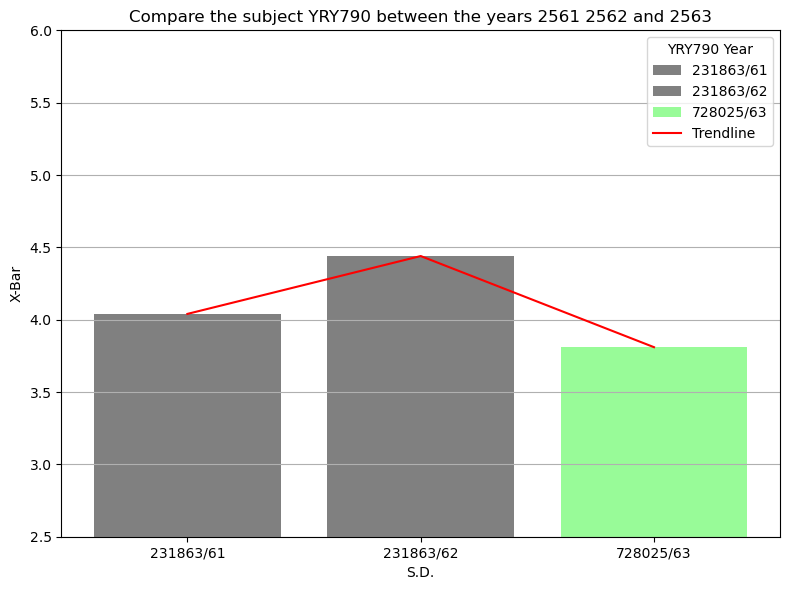

In [36]:
# plot bar chart อธิบาย X-Bar รวมของทุกส่วนของคำถามในวิชา YRY790 ปี 61 62 และ 63
color_yAB = ['gray','gray','palegreen']
plt.figure(figsize=(8,6))
plt.bar(np.arange(3),new_df2['X-Bar'], label=['231863/61','231863/62','728025/63'], color=color_yAB)
plt.ylim(2.5,6.0)
plt.xticks(np.arange(3), labels=['231863/61','231863/62','728025/63'])
plt.title('Compare the subject YRY790 between the years 2561 2562 and 2563')
plt.xlabel('S.D.')
plt.ylabel('X-Bar')
plt.plot(new_df2['รวมทั้งหมด'], new_df2['X-Bar'], color='red', label='Trendline')
plt.legend(title= 'YRY790 Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

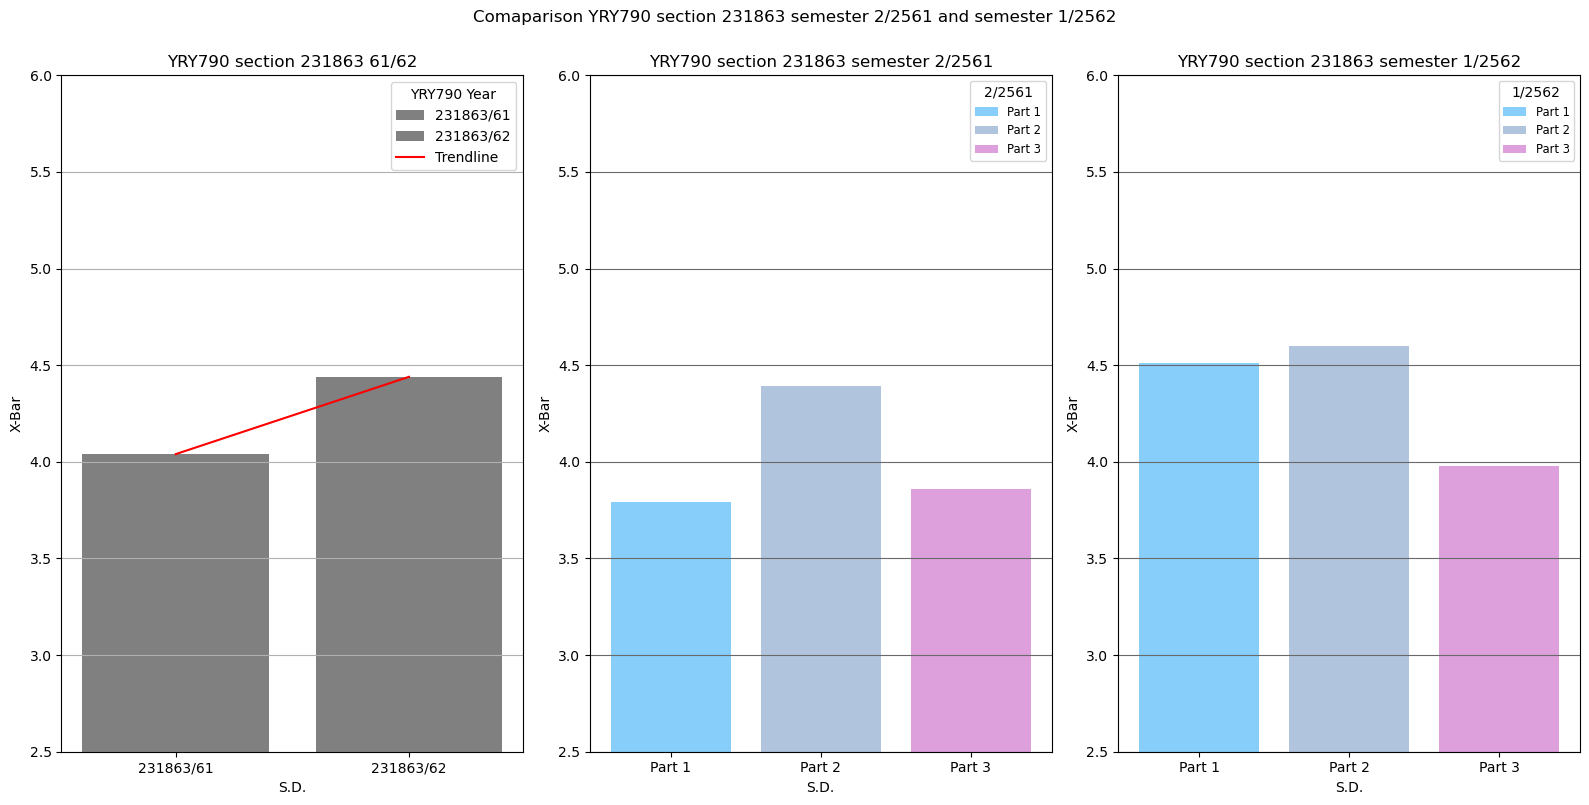

In [37]:
# ขยายต่อจากกราฟด้านบน
locB1 = filtered_dtf2.loc[1]
y_B1 = locB1[['X-Bar_A','X-Bar_B','X-Bar_C']].values.flatten()
x_B1 = locB1[['X-Bar_A','X-Bar_B','X-Bar_C']].values.flatten()
twoyear = new_df2.loc[:1]
colorA = ['lightskyblue','lightsteelblue','plum']
fig ,axs = plt.subplots(1,3, figsize=(16,8))
axs[0].bar(np.arange(2),twoyear['X-Bar'], label=['231863/61','231863/62'], color=color_yAB)
axs[0].set_ylim(2.5,6.0)
axs[0].set_xticks(np.arange(2), labels=['231863/61','231863/62'])
axs[0].set_title('YRY790 section 231863 61/62')
axs[0].set_xlabel('S.D.')
axs[0].set_ylabel('X-Bar')
axs[0].plot(twoyear['รวมทั้งหมด'], twoyear['X-Bar'], color='red', label='Trendline')
axs[0].legend(title= 'YRY790 Year')
axs[0].grid(axis='y')

# กราฟ x-bar แต่ละส่วนของคำถาม วิชา YRY790 ปี 61
axs[1].bar(np.arange(3), y_A1, color=colorA, label=['Part 1', 'Part 2', 'Part 3'])
axs[1].set_title('YRY790 section 231863 semester 2/2561')
axs[1].set_xlabel('S.D.')
axs[1].set_ylabel('X-Bar')
axs[1].set_xticks(np.arange(3), labels=['Part 1','Part 2','Part 3'])
axs[1].set_ylim(2.5,6.0)
axs[1].legend(title='2/2561', fontsize='small')
axs[1].grid(axis='y', color='dimgray')
# กราฟ X-bar แต่ละส่วนของคำถาม วิชา YRY790 ปี 62
axs[2].bar(np.arange(3), y_B1, color=colorA, label=['Part 1','Part 2','Part 3'])
axs[2].set_title('YRY790 section 231863 semester 1/2562')
axs[2].set_xlabel('S.D.')
axs[2].set_ylabel('X-Bar')
axs[2].set_xticks(np.arange(3), labels=['Part 1','Part 2','Part 3'])
axs[2].set_ylim(2.5,6.0)
axs[2].legend(title='1/2562', fontsize='small')
axs[2].grid(axis='y', color='dimgray')

plt.subplots_adjust(wspace=0.4)
plt.suptitle('Comaparison YRY790 section 231863 semester 2/2561 and semester 1/2562', y=1)
plt.tight_layout()
plt.show()

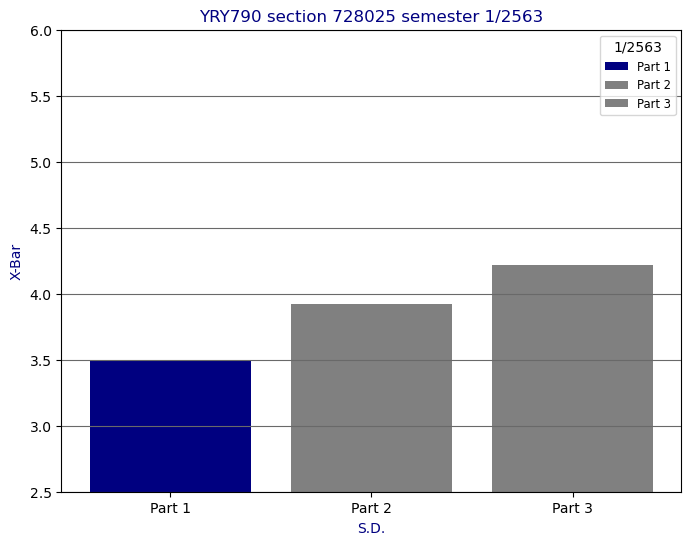

In [38]:
# plot bar chart เป็น X-Bar แต่ละส่วนของคำถาม และอธิบายจุดที่ต่ำที่สุดแล้วหาจุดแก้ไข
y_C1 = locC1[['X-Bar_A','X-Bar_B','X-Bar_C']].values.flatten()
x_C1 = locC1[['X-Bar_A','X-Bar_B','X-Bar_C']].values.flatten()
colorC2 = ['gray','gray','navy']
plt.figure(figsize=(8,6))
plt.bar(np.arange(3), y_C1, color=['navy','gray','gray'], label=['Part 1','Part 2','Part 3'])
plt.title('YRY790 section 728025 semester 1/2563', color='navy')
plt.xlabel('S.D.', color='navy')
plt.ylabel('X-Bar', color='navy')
plt.xticks(np.arange(3), labels=['Part 1','Part 2','Part 3'])
plt.ylim(2.5,6.0)
plt.legend(title='1/2563', fontsize='small')
plt.grid(axis='y', color='dimgray')
plt.show()

In [39]:
# ดึงข้อมูลคำถามส่วนที่ 1 ของ YRY790 ปี 63
keep_yC, sum_s1 = [], []
x_bar_s1,sd_s1 = [], []
r5 = requests.get(listweb_y[2])
s5 = BeautifulSoup(r5.content, 'html.parser')
border_E = s5.find('table',{'border':'1', 'class':'normaldetail'})
for i in border_E:
    tr_e = i.find_all('tr')[3:13] # กำหนด tr ตั้งแต่ 3 ถึง 12
    sum_1 = i.find_all('tr')[12] # กำหนด tr ที่ 12 เพื่อง่ายต้อการเก็บค่า 'รวม' และแยกเป็นลิสต์ sum_s1
    for i2 in tr_e:
        keep_yC.append(i2.text)
        # เก็บ X-bar และ S.D. ของส่วนที่ 1 แต่ละข้อ
        tr_e2 = i2.find_all('td')[-2:-1]
        tr_e3 = i2.find_all('td')[-1:]
        for i3 in tr_e2:
            x_bar_s1.append(float(i3.text)) # X-bar
        for i4 in tr_e3:
            sd_s1.append(float(i4.text)) # S.D.
    # ผลรวมส่วนที่ 1
    for i5 in sum_1:
        sum_s1.append(i5.text)



In [40]:
# จากข้อมูลที่ดึงมานำมา split ให้เหลือแต่ตัวเลขแล้วนำไปเก็บแต่ละลิสต์
listy_c1, listy_c2, listy_c3, listy_c4  = [], [], [], []
listy_c5, listy_c6, listy_c7, listy_c8 = [], [], [], []
listy_c1.append(keep_yC[1].split('1สอนอย่างเป็นระบบ')[1])
listy_c2.append(keep_yC[2].split('2สอนให้คิด วิเคราะห์ วิจารณ์')[1])
listy_c3.append(keep_yC[3].split('3กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม')[1])
listy_c4.append(keep_yC[4].split('4เปิดโอกาสให้แสดงความคิดเห็นและแลกเปลี่ยนประสบการณ์ ทั้งภายในและภายนอกห้องเรียน')[1])
listy_c5.append(keep_yC[5].split('5มีการให้นำเสนองาน/มีการวัดผลโดยวิธีอื่นๆที่สะท้อนความสามารถของผู้เรียนนอกเหนือจากการตอบข้อสอบ')[1])
listy_c6.append(keep_yC[6].split('6ทำให้เห็นความสัมพันธ์กับวิชาอื่นที่เกี่ยวข้อง')[1])
listy_c7.append(keep_yC[7].split('7ใช้สื่อและอุปกรณ์ช่วยสอนได้ดี')[1])
listy_c8.append(keep_yC[8].split('8แนะนำแหล่งค้นคว้าข้อมูลเพิ่มเติมให้')[1])

# ทำเป็นลิสต์ซ้อนลิสต์เพื่อนเข้าลูปได้หมดทีเดียว
power_listy = [listy_c1,listy_c2,listy_c3,listy_c4,listy_c5,listy_c6,listy_c7,listy_c8]
power_listy

[['450.00225.000.00112.500.00112.504.291.11'],
 ['112.50450.00112.50112.50112.500.003.381.30'],
 ['112.50225.00337.50112.50112.500.003.131.25'],
 ['225.00337.50225.00112.500.000.003.751.04'],
 ['112.50562.50112.50112.500.000.003.750.89'],
 ['112.50337.50225.00225.000.000.003.381.06'],
 ['112.50450.00225.000.00112.500.003.501.20'],
 ['112.50225.00225.00112.50225.000.002.881.46']]

In [41]:
# ดึงค่า คะแนน 0-5 ออกมาเก็บในลิสต์ใหม่
y_5point, y_4point, y_3point, y_2point, y_1point, y_0point = [], [], [], [], [], []
for y1 in range(len(power_listy)):
    for py in power_listy[y1]:
        y_5point.append(int(py[0]))
        y_4point.append(int(py[6]))
        y_3point.append(int(py[12]))
        y_2point.append(int(py[18]))
        y_1point.append(int(py[24]))
        y_0point.append(int(py[30]))
# ดึงค่า คะแนน 0-5 ที่เป็น 'รวม' ออกไปเก็บให้อยู่ลิสต์เดียวกัน
y_5point.append(int(sum_s1[1]))
y_4point.append(int(sum_s1[3]))  
y_3point.append(int(sum_s1[5])) 
y_2point.append(int(sum_s1[7]))
y_1point.append(int(sum_s1[9]))
y_0point.append(int(sum_s1[11]))
# แก้ไขค่าที่ผิด      
y_2point[0] = 1
y_1point[6] = 1
y_0point[0] = 1

In [58]:
# DataFrame ของคำถามส่วนที่ 1 ในวิชา YRY790 ปี 63
questionSec1_y = ['Teach systematically','Teach critical thinking, analysis, and evaluation','Stimulate a conducive learning atmosphere with interesting and engaging teaching methods',
                  'Encourage expression of opinions and exchange of experiences both within and outside the classroom','Include presentations or use alternative methods to assess learners, reflecting their abilities beyond standard test responses',
                  'Demonstrate the relevance to other related subjects','Effectively use teaching aids and equipment',
                  'Recommend additional sources for further research','Summarize']
df_ySec1_63 = pd.DataFrame(columns=['ส่วนที่ 1 ข้อคำถาม','5 point','4 point','3 point','2 point','1 point','0 point'])
df_ySec1_63['ส่วนที่ 1 ข้อคำถาม'] = questionSec1_y
df_ySec1_63['5 point'] = y_5point
df_ySec1_63['4 point'] = y_4point
df_ySec1_63['3 point'] = y_3point
df_ySec1_63['2 point'] = y_2point
df_ySec1_63['1 point'] = y_1point
df_ySec1_63['0 point'] = y_0point

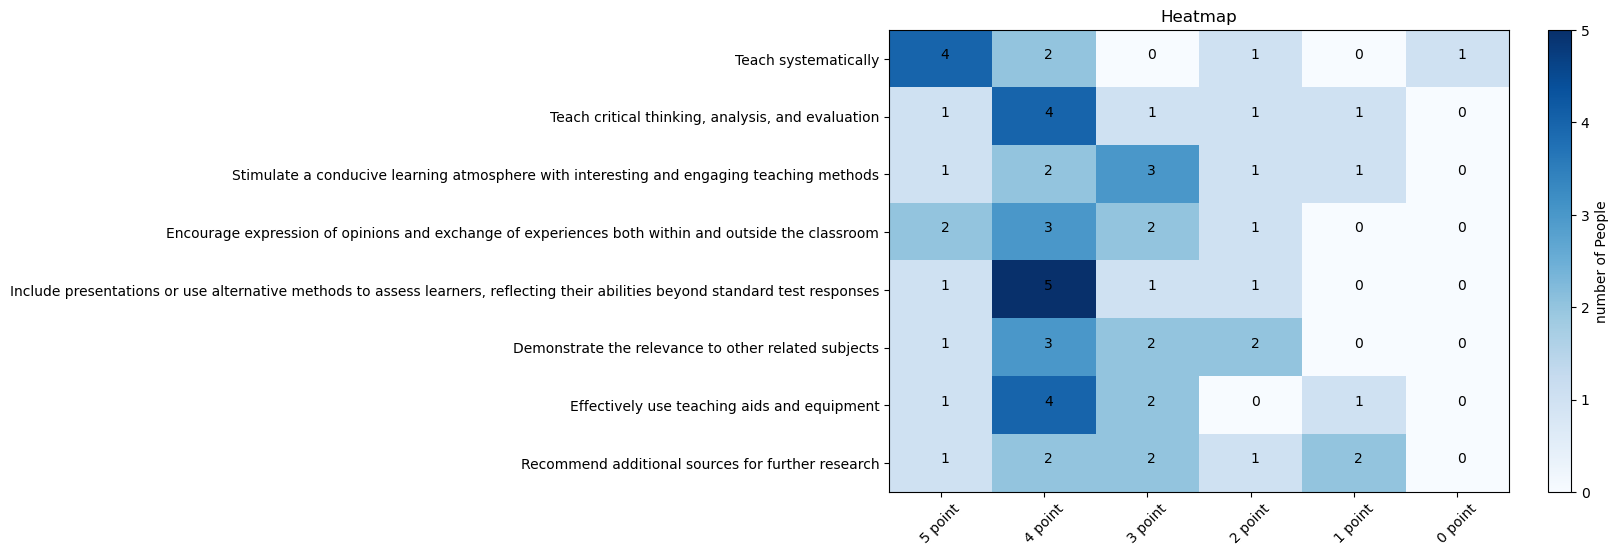

In [60]:
# แสดงความสัมพันธ์ส่วนที่ 1 แบบ heatmap
loc_yf = df_ySec1_63.drop(8)
loc_yf.set_index('ส่วนที่ 1 ข้อคำถาม', inplace=True)

# สร้าง Heatmap โดยใช้ imshow
plt.figure(figsize=(10, 6))
plt.imshow(loc_yf, cmap='Blues', aspect='auto', interpolation='nearest')

# เพิ่ม colorbar
cbar = plt.colorbar()
cbar.set_label('number of People')
# เพิ่มตัวเลขลงในกราฟ
for i in range(len(loc_yf)):
    for j in range(len(loc_yf.columns)):
        value = loc_yf.iloc[i, j]
        plt.text(j, i, f"{value}", color="black", size=10)


# กำหนดชื่อแกน
plt.xticks(range(len(loc_yf.columns)), loc_yf.columns, rotation=45)
plt.yticks(range(len(loc_yf.index)), loc_yf.index)
plt.title('Heatmap')
plt.show()

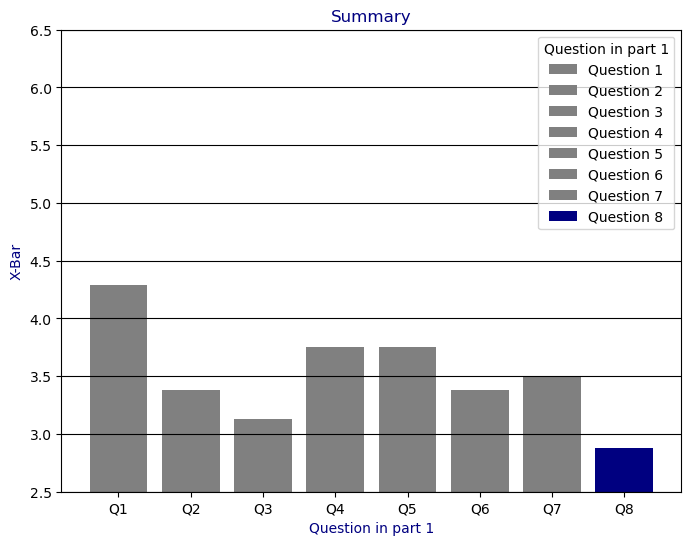

In [44]:
# สร้าง Dataframe ใหม่สำหรับดึงค่า X-Bar และ S.D. ของแต่ละคำถาม
addval = df_ySec1_63
addval['X-Bar'] = x_bar_s1
addval['S.D.'] = sd_s1
addval = addval.drop(8)

# plot bar chart สำหรับอธิบายสรุป โดยใช้คำถามเป็นส่วนที่ควรปรับปรุงมากที่สุด
y_C2 = addval['X-Bar'].values.flatten()
x_C2 = addval['S.D.'].values.flatten()
labelC2 = ['Question 1','Question 2','Question 3','Question 4','Question 5','Question 6','Question 7','Question 8']
colorC2 = ['gray','gray','gray','gray','gray','gray','gray','navy']
plt.figure(figsize=(8,6))
plt.bar(np.arange(8), y_C2, label=labelC2, color=colorC2)
plt.ylim(2.5,6.5)
plt.xticks(np.arange(8), labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8'])
plt.ylabel('X-Bar', color='navy')
plt.xlabel('Question in part 1', color='navy')
plt.title('Summary', color='navy')
plt.legend(title='Question in part 1')
plt.grid(axis='y', color='Black')
plt.show()